# LAB 10 : Restricted Boltzmann Machine

Name : Hrishikesh Pable

Roll Number : 200010037

References :

1. MNIST Dataset : http://yann.lecun.com/exdb/mnist/
2. Movie Lens Dataset : https://grouplens.org/datasets/movielens/
3. https://towardsdatascience.com/restricted-boltzmann-machine-how-to-create-a-recommendation-system-for-movie-review-45599a406deb
4. https://towardsdatascience.com/restricted-boltzmann-machine-as-a-recommendation-system-for-movie-review-part-2-9a6cab91d85b
5. https://github.com/echen/restricted-boltzmann-machines

# **Problem 1** : MNIST Digit Classification using RBM + Logistic Regression

1. Consider MNIST Digit Dataset
2. Use the Bernoulli RBM API from Sci-kit learn package and create a pipeline of RBM network and logistic regression to classify the digits

## Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming :
  Please write a program to demonstrate the same

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


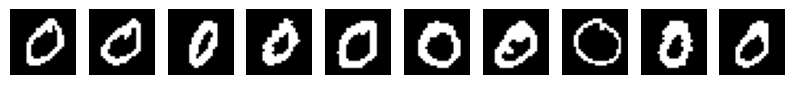

In [4]:
# Prepare the data

import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Randomly select 600 samples from each class in the training set
np.random.seed(0)
num_classes = 10

x_train_list = []
y_train_list = []
for i in range(num_classes):
    x_train_list.append(x_train[y_train == i][:600])
    y_train_list.append(y_train[y_train == i][:600])
x_train = np.concatenate(x_train_list)
y_train = np.concatenate(y_train_list)

# Randomly select 100 samples from each class in the test

x_test_list = []
y_test_list = []
for i in range(num_classes):
    x_test_list.append(x_test[y_test == i][:100])
    y_test_list.append(y_test[y_test == i][:100])
x_test = np.concatenate(x_test_list)
y_test = np.concatenate(y_test_list)

# Since Bernoulli RBM works with binary data, we binarize the data
x_train = (x_train > 127).astype(float)
x_test = (x_test > 127).astype(float)

# Plot the first 10 samples
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')

In [2]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

In [ ]:
# Training the classifier

from sklearn.base import clone

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.

rbm.learning_rate = 0.06
rbm.n_iter = 10

# More components tend to give better prediction performance, but larger
# fitting time

rbm.n_components = 100
logistic.C = 6000.0

# Training RBM-Logistic Pipeline

rbm_features_classifier.fit(x_train.reshape(-1, 784), y_train)

# Training the Logistic regression classifier directly on the pixel

raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(x_train.reshape(-1, 784), y_train)

In [ ]:
from sklearn import metrics

y_pred = rbm_features_classifier.predict(x_test.reshape(-1, 784))
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))

y_pred = raw_pixel_classifier.predict(x_test.reshape(-1, 784))
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))

In [ ]:
# Vary the number of components and plot the results

n_components = [10, 50, 100, 200, 500]
logistic.C = 6000.0
rbm.learning_rate = 0.06
rbm.n_iter = 20

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

for n_component in n_components:
    print("Extracting the top %d RBM components..." % (n_component))
    rbm.n_components = n_component
    rbm_features_classifier.fit(x_train.reshape(-1, 784), y_train)

    y_pred = rbm_features_classifier.predict(x_test.reshape(-1, 784))
    print("Logistic regression using RBM features, %d components:\n%s\n" % (
        n_component, metrics.classification_report(y_test, y_pred)))


In [ ]:
# Vary the C parameter of the Logistic regression and plot the results

Cs = [1, 10, 100, 1000, 10000]
n_components = 100
rbm.n_components = n_components
rbm.learning_rate = 0.06

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

for C in Cs:
    print("Fitting Logistic regression with C = %d" % C)
    logistic.C = C
    rbm_features_classifier.fit(x_train.reshape(-1, 784), y_train)

    y_pred = rbm_features_classifier.predict(x_test.reshape(-1, 784))
    print("Logistic regression using RBM features, %d components:\n%s\n" % (
        C, metrics.classification_report(y_test, y_pred)))

    plt.figure(figsize=(4.2, 4))
    for i, comp in enumerate(rbm.components_):
        plt.subplot(10, 10, i + 1)
        plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

    plt.suptitle('100 components extracted by RBM', fontsize=16)
    
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

## Inferences and Conclusion : State all the key observations and conclusion

1. RBM + logistic classifier requires binary input data and hence the MNIST dataset is binarized.

2. RBM + logistic classifier with 200 components works better than logistic regression alone.

3. As the number of components in RBM increases, the accuracy of the model increases.

4. Increasing C value in logistic regression increases the accuracy of the model.

# **Problem 2** : RBM as a Recommendation System for Movie Review on Movie Lens Dataset

1. Use the Movie Lens Dataset, Split it into train-test set. Convert the ratings to Binary (The task is to predict if the user likes a movie or not)
2. Build a RBM network, train the model and test it on the test set

## Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming :
  Please write a program to demonstrate the same

In [ ]:
# Import the movie lens dataset

import pandas as pd

# Load the data



## Inferences and Conclusion : State all the key observations and conclusion